In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
salary = pd.read_csv("data hi data.csv")
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
salary.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
salary.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary.duplicated().sum()

0

In [7]:
corr=salary[['Salary','YearsExperience']].corr()
corr

,Salary,YearsExperience
Salary,1.000000,0.978242
YearsExperience,0.978242,1.000000


In [8]:
len(salary)

30

In [9]:
len(salary[salary.duplicated()])

0

In [10]:
salary.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

<Axes: ylabel='Frequency'>

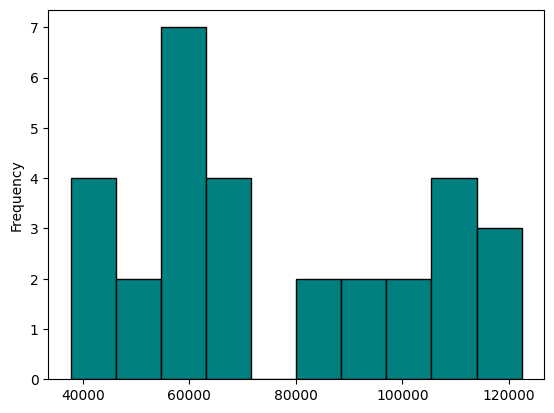

In [11]:
salary['Salary'].plot(kind='hist', color='teal', edgecolor='black')

<Axes: ylabel='Frequency'>

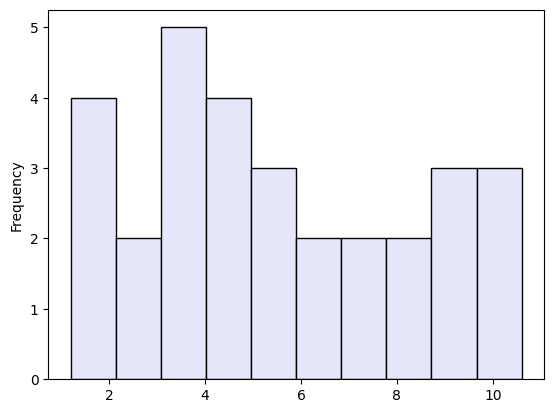

In [12]:
salary['YearsExperience'].plot(kind='hist', color='lavender', edgecolor='black')

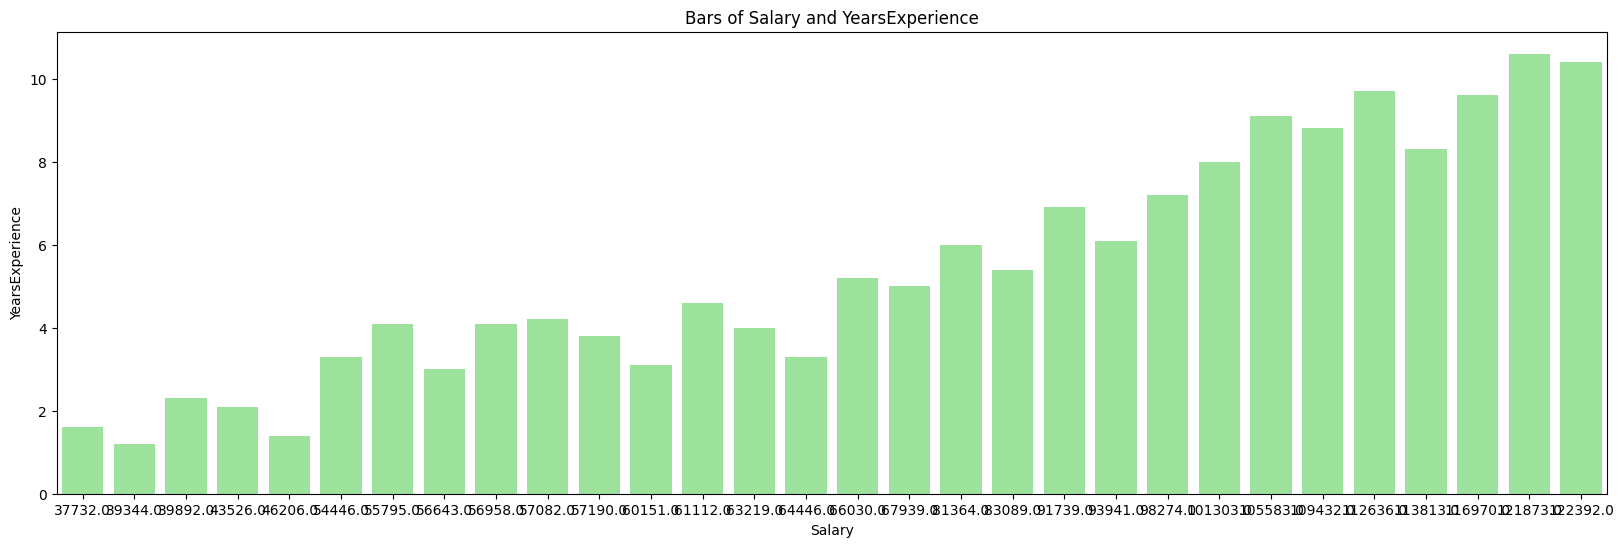

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(x='Salary',y='YearsExperience', data=salary,color='lightgreen')
plt.title("Bars of Salary and YearsExperience")
plt.xlabel("Salary")
plt.show()

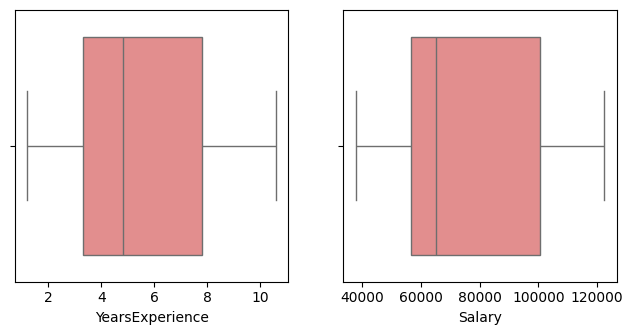

In [14]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['YearsExperience','Salary']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col,data = salary,color='lightcoral')
plt.show()

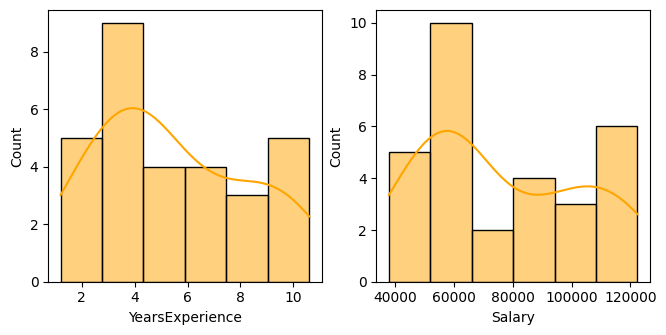

In [15]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['YearsExperience','Salary']):
    plt.subplot(3,3,i+1)
    sns.histplot(x = col,data = salary,kde=True,color='orange')
plt.show()

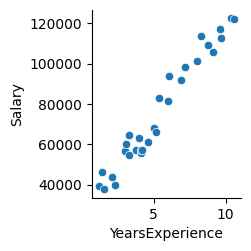

In [16]:
sns.pairplot(salary,
             y_vars =['Salary'],
            x_vars=['YearsExperience'])
plt.show()

In [17]:
x=salary[['YearsExperience']]
y=salary[['Salary']]

In [18]:
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(24, 1)

In [22]:
x_test.shape

(6, 1)

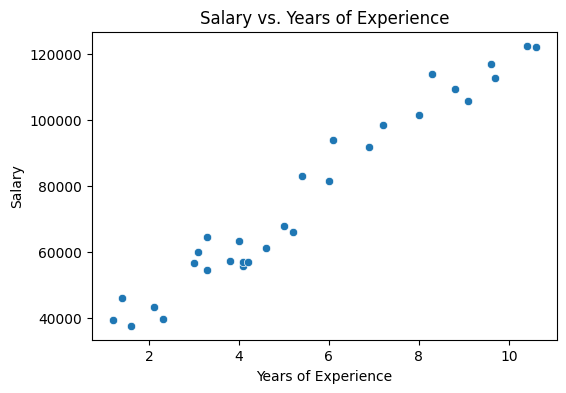

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
salary = (salary - salary.min()) / (salary.max() - salary.min())
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0.000000,0.000000,0.019041
1,0.034483,0.021277,0.100094
2,0.068966,0.042553,0.000000
3,0.103448,0.095745,0.068438
4,0.137931,0.117021,0.025514


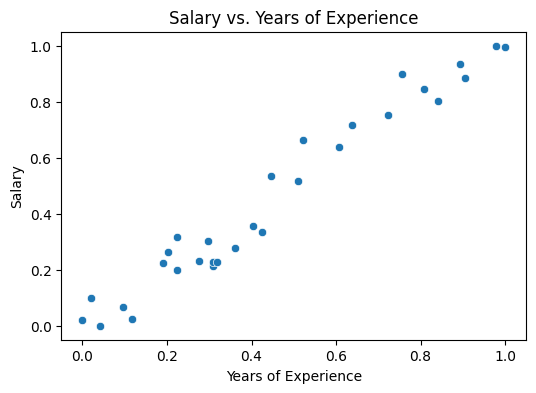

In [25]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

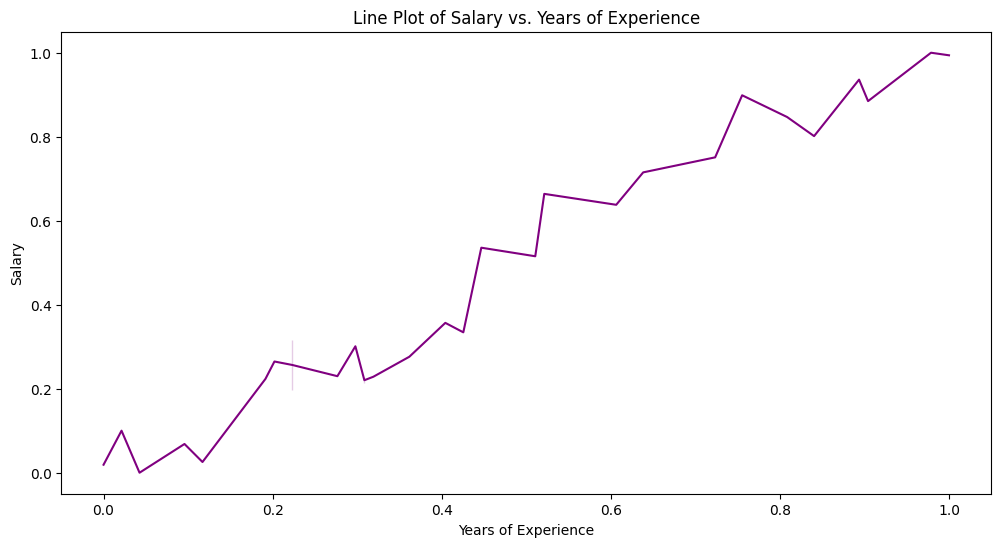

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearsExperience', y='Salary', data=salary, color='purple')  # Change color here
plt.title("Line Plot of Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [27]:
X = salary[['YearsExperience']]
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

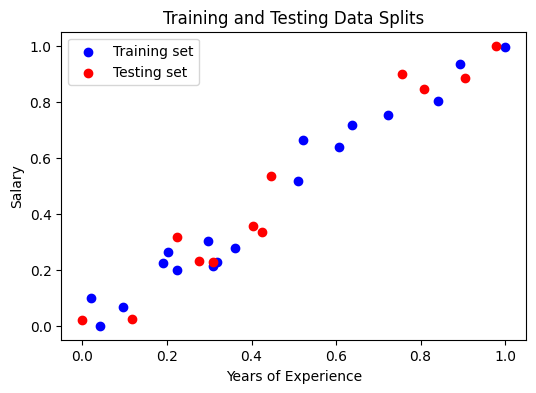

In [28]:
plt.figure(figsize=(6, 4))

# Plot training set
plt.scatter(X_train, y_train, color='blue', label='Training set')

# Plot testing set
plt.scatter(X_test, y_test, color='red', label='Testing set')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training and Testing Data Splits')
plt.legend()
plt.show()

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

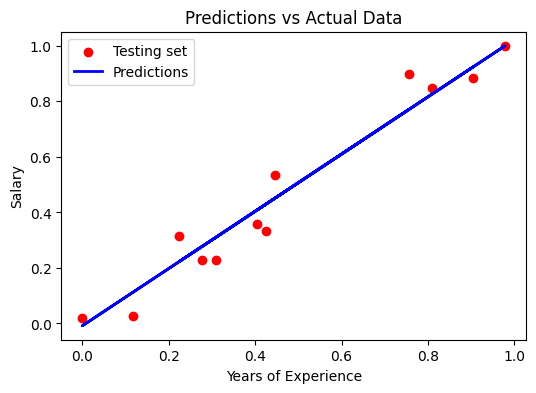

In [30]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))

plt.scatter(X_test, y_test, color='red', label='Testing set')

plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predictions')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()

In [31]:
r2 = r2_score(y_test, y_pred)
r2

0.9532338376280693